In [93]:
from dotenv import load_dotenv
import os
import base64
from requests import post, get
import json
import numpy as np
import pandas as pd

In [94]:
load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [95]:
def get_token():

    
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
    
    url = 'https://accounts.spotify.com/api/token'
    
    headers = {
        "Authorization":"Basic " + auth_base64,
        "Content-Type":"application/x-www-form-urlencoded"
    }
    
    data = {"grant_type":"client_credentials"}
    
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result['access_token']
    return token

In [96]:
def get_auth_header(token):
    return {'Authorization':'Bearer ' + token}

In [97]:
def search_for_artist(token, artist_name):
    url = 'https://api.spotify.com/v1/search'
    headers = get_auth_header(token)
    query = f"?q={artist_name}&type=artist&limit=1"
    
    query_url = url + query
    result = get(query_url, headers=headers)
    json_result = json.loads(result.content)['artists']['items']
    return json_result

In [98]:
def get_songs_by_artist(token, artist_id):
    url = f"https://api.spotify.com/v1/artist/{artist_id}/top-tracks?"
    headers = get_auth_header(token)
    result = get(url, headers=headers)
    json_result = json.loads(result.content)
    return json_result

In [99]:
token = get_token()

In [100]:
result = search_for_artist(token, 'Olivia Rodrigo')
artist_id = result[0]['id']
artist_name = result[0]['name']
#songs = get_songs_by_artist(token, artist_id)

In [101]:
result[0]['genres'][0]

'pop'

In [102]:
#artist_list = ['Adele', 'ACDC', 'The Rolling Stone', 'The Smiths', 'Taylor Swift', 'Ed Sheeran', 'Jim Croce', 'Michael Jackson', 'Prince', 'Fleetwood Mac', 'Post Malone', 'Jay-Z', 'Kanye West', 'Eagles', 'Miley Cyrus', 'Selena Gomez', 'One Direction', 'Paramore', 'Blink-182', 'Van Morrison', 'Billy Joel', 'Olivia Rodrigo', 'Joji', 'Avril Lavigne', 'Dua Lipa', 'Justin Beiber', 'Coldplay', 'Frank Sinatra', 'Nat King Cole', 'The Sundays', 'Deftones', 'Mac Miller', 'Future', 'Jackson Browne', 'Frank Ocean', 'Otis Redding', 'Marvin Gaye', 'Yeat', 'System of a Down', 'Blood Orange', 'Beach House', 'Alvvays', 'Dominic Fike', 'Don Mclean', 'Mac Demarco', 'Playboi Carti', 'Logic', 'Chief Keef', 'Radiohead', 'Lil Keed', 'The Outfield', 'Earl Sweatshirt', 'Sade', 'Skizzy Mars', 'Two Door Cinema Club', 'Creed', 'Kodak Black', 'Kid Cudi', 'Pearl Jam', 'Declan McKenna', 'Phoenix', 'Fall Out Boy', 'Current Joys', 'Daniel Caesar', 'Lil Nas X', 'Joy Division', 'Rod Stewart', 'Tyler Childers', 'Zach Bryan', 'Gregory Alan Isakov', 'Caamp', 'Travis Scott', 'Gucci Mane', 'Sheck Wes', 'Migos', 'Aerosmith', 'Whitesnake', 'Jimi Hendrix', 'Eric Clapton', 'Thin Lizzy', 'Led Zeppelin', 'Stevie Ray Vaughan', 'Galantis', 'Illenium', 'Zedd']

In [103]:
top_100 = ['Drake', 'Taylor Swift', 'Bad Bunny', 'The Weeknd', 'Ed Sheeran', 'Ariana Grande', 'Justin Bieber', 'Eminem', 'BTS', 'Post Malone', 'Kanye West', 'J Balvin', 'Billie Eilish', 'Coldplay', 'Juice WRLD', 'Dua Lipa', 'Imagine Dragons', 'Rihanna', 'Travis Scott', 'XXXTENTACION', 'Ozuna', 'David Guetta', 'Khalid', 'Maroon 5', 'Bruno Mars', 'Kendrick Lamar', 'Shawn Mendes', 'Sam Smith', 'Calvin Harris', 'Daddy Yankee', 'Beyonce', 'Queen', 'Harry Styles', 'Future', 'One Direction', 'Lana Del Rey', 'Lady Gaga', 'Chris Brown', 'J. Cole', 'Nicki Minaj', 'Adele', 'KAROL G', 'Anuel AA', 'Rauw Alejandro', 'The Chainsmokers', 'Selena Gomez', 'Shakira', 'The Beatles', 'Linkin Park', 'Halsey', 'Lil Uzi Vert', 'Sia', 'Arctic Monkeys', 'Maluma', 'Marshmello', 'Doja Cat', 'Katy Perry', 'Twenty One Pilots', 'Miley Cyrus', 'Avicii', 'SZA', 'Camila Cabello', 'Metro Boomin', 'Kygo', '21 Savage', 'Farruko', 'Red Hot Chili Peppers', 'Olivia Rodrigo', 'OneRepublic', 'Lil Baby', 'Myke Towers', 'Michael Jackson', 'Jason Derulo', 'Demi Lovato', 'Mac Miller', 'Pitbull', 'Pop Smoke', 'Tyler, The Creator', 'Metallica', 'Morgan Wallen', 'Lil Peep', 'Elton John', 'DJ Snake', '$uicideboy$', 'Feid', 'BLACKPINK', 'Ellie Goulding', 'DaBaby', 'Lil Nas X', 'Lil Wayne', 'Tiesto', 'Alan Walker', 'Sech', 'Frank Ocean', ' Young Thug', 'Cardi B', 'Martin Garrix', 'Charlie Puth', 'Panic! At The Disco', 'AC/DC']

In [104]:
def plug_list(artist_list):
    artist_info = {}
    idx = []
    for artist in artist_list:
        result = search_for_artist(token, artist)
        genre = result[0]['genres'][0]
        artist_info[artist] = genre
        idx.append(artist)
        
        
    #artist_frame = pd.DataFrame(artist_info, index=idx)
    artist_frame = pd.DataFrame(list(artist_info.items()), columns=['artist', 'genre'])
    artist_frame = artist_frame.set_index('artist')
    
    return artist_frame

plug_list(top_100)

,genre
artist,
Drake,canadian hip hop
Taylor Swift,pop
Bad Bunny,reggaeton
The Weeknd,canadian contemporary r&b
Ed Sheeran,pop
...,...
Cardi B,pop
Martin Garrix,dutch edm
Charlie Puth,pop


In [105]:
artist_df = plug_list(top_100)

In [109]:
import networkx as nx

gr = nx.Graph() # Build the graph

new_list = {}
for artist in top_100:
    gr.add_node(artist)

artist_df_reset = artist_df.reset_index()

for genre in artist_df_reset['genre'].unique():
    # Filter the DataFrame for the current genre
    artists_in_genre_df = artist_df_reset[artist_df_reset['genre'] == genre][['artist']]

    for i in range(len(artists_in_genre_df)):
        for j in range(i + 1, len(artists_in_genre_df)):
            # Add an edge between artists sharing the same genre
            gr.add_edge(artists_in_genre_df.iloc[i]['artist'], artists_in_genre_df.iloc[j]['artist'])

            # Update neighbor_list dictionary
            if artists_in_genre_df.iloc[i]['artist'] not in new_list:
                new_list[artists_in_genre_df.iloc[i]['artist']] = []
            new_list[artists_in_genre_df.iloc[i]['artist']].append(artists_in_genre_df.iloc[j]['artist'])

            if artists_in_genre_df.iloc[j]['artist'] not in new_list:
                new_list[artists_in_genre_df.iloc[j]['artist']] = []
            new_list[artists_in_genre_df.iloc[j]['artist']].append(artists_in_genre_df.iloc[i]['artist'])

# ...By using reset_index(), we're converting the index back to a regular column, and the subsequent code should work as expected. I appreciate your patience, and I hope this resolves the issue.

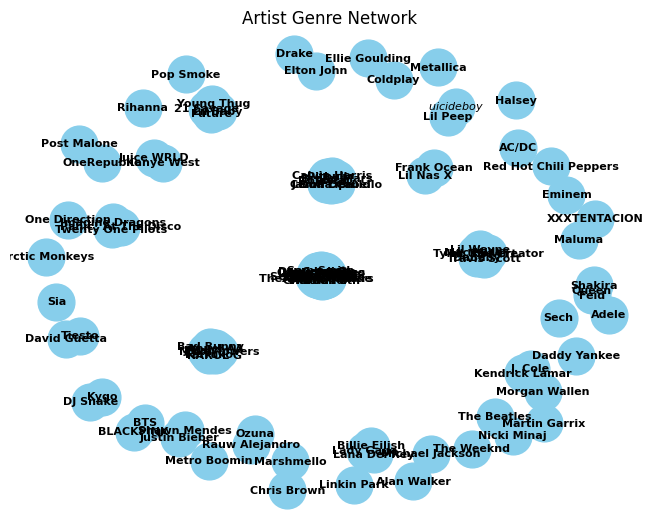

Taylor Swift: ['Ed Sheeran', 'Ariana Grande', 'Khalid', 'Maroon 5', 'Sam Smith', 'Beyonce', 'Harry Styles', 'The Chainsmokers', 'Selena Gomez', 'Katy Perry', 'Miley Cyrus', 'SZA', 'Olivia Rodrigo', 'Demi Lovato', 'Cardi B', 'Charlie Puth']
Ed Sheeran: ['Taylor Swift', 'Ariana Grande', 'Khalid', 'Maroon 5', 'Sam Smith', 'Beyonce', 'Harry Styles', 'The Chainsmokers', 'Selena Gomez', 'Katy Perry', 'Miley Cyrus', 'SZA', 'Olivia Rodrigo', 'Demi Lovato', 'Cardi B', 'Charlie Puth']
Ariana Grande: ['Taylor Swift', 'Ed Sheeran', 'Khalid', 'Maroon 5', 'Sam Smith', 'Beyonce', 'Harry Styles', 'The Chainsmokers', 'Selena Gomez', 'Katy Perry', 'Miley Cyrus', 'SZA', 'Olivia Rodrigo', 'Demi Lovato', 'Cardi B', 'Charlie Puth']
Khalid: ['Taylor Swift', 'Ed Sheeran', 'Ariana Grande', 'Maroon 5', 'Sam Smith', 'Beyonce', 'Harry Styles', 'The Chainsmokers', 'Selena Gomez', 'Katy Perry', 'Miley Cyrus', 'SZA', 'Olivia Rodrigo', 'Demi Lovato', 'Cardi B', 'Charlie Puth']
Maroon 5: ['Taylor Swift', 'Ed Sheeran',

In [125]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming g is the graph you created and neighbor_list is the dictionary of neighbors
# ...

# Visualize the graph
pos = nx.spring_layout(gr)  # You can choose a different layout if you prefer

nx.draw(gr, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
plt.title("Artist Genre Network")
plt.show()

# Display neighbor_list
for artist, neighbors in new_list.items():
    print(f"{artist}: {neighbors}")

In [114]:
degree = nx.degree_centrality(gr)

# Sort actors by degree centrality
sorted_artists = sorted(degree.items(), key=lambda x: x[1], reverse=True)

print("Top 20 Artists:")
for i, (art, degree) in enumerate(sorted_artists[:20], 1):
    print(f"{art}: {degree}")

Top 20 Artists:
Taylor Swift: 0.16161616161616163
Ed Sheeran: 0.16161616161616163
Ariana Grande: 0.16161616161616163
Khalid: 0.16161616161616163
Maroon 5: 0.16161616161616163
Sam Smith: 0.16161616161616163
Beyonce: 0.16161616161616163
Harry Styles: 0.16161616161616163
The Chainsmokers: 0.16161616161616163
Selena Gomez: 0.16161616161616163
Katy Perry: 0.16161616161616163
Miley Cyrus: 0.16161616161616163
SZA: 0.16161616161616163
Olivia Rodrigo: 0.16161616161616163
Demi Lovato: 0.16161616161616163
Cardi B: 0.16161616161616163
Charlie Puth: 0.16161616161616163
Dua Lipa: 0.07070707070707072
Bruno Mars: 0.07070707070707072
Calvin Harris: 0.07070707070707072


In [119]:
genre_counts = artist_df['genre'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
genre
pop                          17
dance pop                     8
hip hop                       6
reggaeton                     6
atl hip hop                   4
art pop                       3
modern rock                   3
edm                           2
canadian pop                  2
cloud rap                     2
conscious hip hop             2
big room                      2
colombian pop                 2
puerto rican pop              2
k-pop                         2
lgbtq+ hip hop                2
chicago rap                   2
brooklyn drill                1
rap                           1
alternative rock              1
r&b                           1
piano rock                    1
canadian hip hop              1
hard rock                     1
contemporary country          1
latin pop                     1
glam rock                     1
indietronica                  1
electro house                 1
panamanian pop                1
dutch edm           

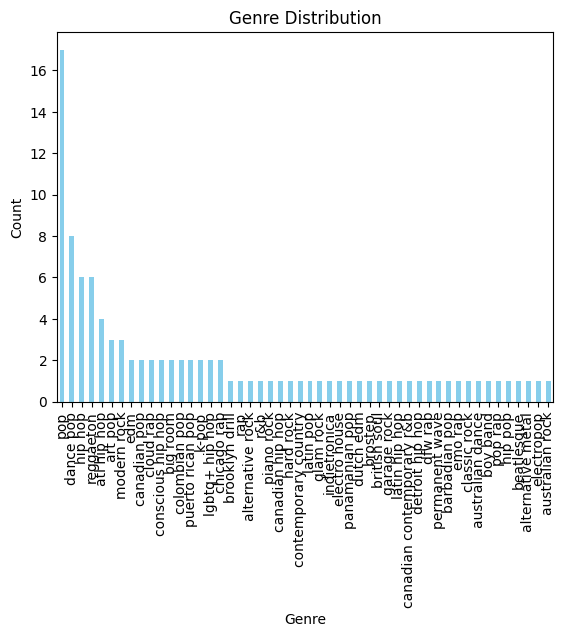

In [126]:
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

In [120]:
top_genres = genre_counts.nlargest(3)

# Display the top 3 genres
print("Top 3 Genres:")
print(top_genres)

Top 3 Genres:
genre
pop          17
dance pop     8
hip hop       6
Name: count, dtype: int64
